In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [12]:
oldData = pd.read_csv('old.csv', encoding='UTF-8')
oldData

,Ticker,Transcript,Month,Day,Year,Date,Words,negative,positive,uncertainty,...,CDS Price Next 28 Day,One Day Return,6 Day Return,7 Day Return,13 Day Return,14 Day Return,20 Day Return,21 Day Return,27 Day Return,28 Day Return
0,FDX,['fedex corporation (nyse:fdx) q2 2018 results...,12,19,2017,2017-12-19,"['fedex', 'cyberattack', 'tnt', 'ground', 'raj...",73,82,15,...,37.755,-0.075942,-0.069807,-0.075942,-0.060729,-0.077659,-0.096553,-0.089192,-0.068581,-0.073611
1,FDX,"[""fedex corporation (nyse:fdx) q3 2018 results...",3,20,2018,2018-03-20,"['fedex', 'express', 'fy', 'raj', 'network', '...",88,77,18,...,45.930,-0.022567,-0.034089,-0.022567,-0.016187,-0.038469,-0.048086,-0.063416,-0.057608,-0.125309
2,CAG,"[""conagra brands, inc. (nyse:cag) q3 2019 resu...",3,21,2018,2018-03-21,"['pinnacle', 'conagra', 'brand', 'legacy', 'fr...",75,77,19,...,52.210,0.106484,0.105104,0.106484,0.097862,0.078376,-0.014227,-0.016727,-0.087084,-0.099672
3,COF,"[""capital one financial corp. (nyse:cof) q1 20...",4,24,2018,2018-04-24,"['card', 'growth', 'loan', 'auto', 'vintage', ...",125,77,22,...,25.775,0.040932,0.025460,0.040932,0.022131,0.032119,-0.035448,0.010576,0.014101,0.009597
4,SO,"[""the southern co. (nyse:so) q1 2018 earnings ...",5,2,2018,2018-05-02,"['southern', 'equity', 'llc', 'art', 'inc', 't...",64,70,22,...,65.245,-0.016277,-0.008097,-0.016277,-0.016849,-0.024865,0.096679,0.100605,0.177900,0.067316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,AES,['the aes corporation (nyse:aes) q3 2020 earni...,11,6,2020,2020-11-06,"['gluski', 'renewable', 'fluence', 'storage', ...",98,84,23,...,80.750,-0.004948,-0.022683,-0.004948,-0.016900,0.030716,-0.009510,-0.059568,0.020306,0.037784
267,NOC,"[""northrop grumman (nyse:noc) baird 2020 globa...",11,11,2020,2020-11-11,"['program', 'unmanned', 'orbital', 'atk', 'gro...",90,71,16,...,23.675,0.098517,0.064909,0.098517,0.183855,0.250741,0.191763,0.234926,0.484679,0.560132
268,DE,['deere & company (nyse:de) q4 2020 earnings c...,11,25,2020,2020-11-25,"['ag', 'turf', 'technology', 'precision', 'mar...",104,76,18,...,31.300,0.034751,0.009478,0.034751,0.212300,0.227885,0.282224,0.250632,0.327085,0.318450
269,FCX,"[""freeport-mcmoran inc. (nyse:fcx) citi basic ...",12,2,2020,2020-12-02,"['copper', 'quirk', 'freeport', 'mining', 'und...",122,74,17,...,104.055,-0.008190,-0.027014,-0.008190,0.005652,0.014657,0.068302,0.049574,0.025817,-0.003209


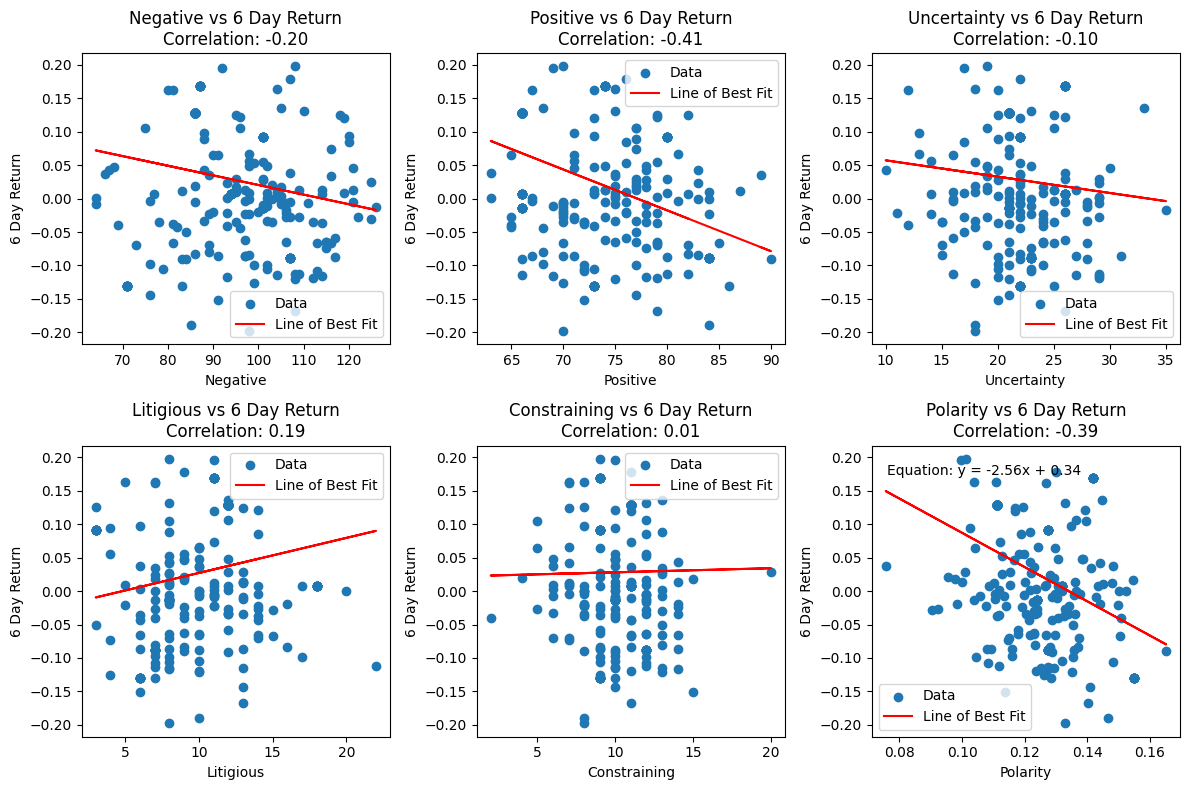

In [13]:
# Define the features and their corresponding labels
features = ['negative', 'positive', 'uncertainty', 'litigious', 'constraining', 'Polarity']
labels = ['Negative', 'Positive', 'Uncertainty', 'Litigious', 'Constraining', 'Polarity']

# Create scatter plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    x = oldData[feature]
    y = oldData['6 Day Return']
    
    # Filter out data points with 'Negative' < -0.2 and '6 Day Return' > 0.2
    mask = (y >= -0.2) & (y <= 0.2)
    x_filtered = x[mask]
    y_filtered = y[mask]
    
        # Calculate the line of best fit
    fit = np.polyfit(x_filtered, y_filtered, 1)
    line = np.polyval(fit, x_filtered)
    
    # Calculate the correlation coefficient
    correlation = np.corrcoef(x_filtered, y_filtered)[0, 1]
    
    # Plot the scatter plot and line of best fit
    ax.scatter(x_filtered, y_filtered, label='Data')
    ax.plot(x_filtered, line, color='red', label='Line of Best Fit')
    ax.set_xlabel(labels[i])
    ax.set_ylabel('6 Day Return')
    
    if feature == 'Polarity':
        # Print the equation of the line of best fit
        equation = f'Equation: y = {fit[0]:.2f}x + {fit[1]:.2f}'
        ax.annotate(equation, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10)
    
    ax.set_title(f'{labels[i]} vs 6 Day Return\nCorrelation: {correlation:.2f}')
    ax.legend()

plt.tight_layout()
plt.show()

In [70]:
newData = pd.read_csv('Processed_With_New.csv', encoding='UTF-8')
newData = newData[newData['Year'] > 2022]
newData

,Ticker,BICS Sector,Transcript,Month,Day,Year,Date,Words,negative,positive,...,22 Day Return,23 Day Return,24 Day Return,25 Day Return,26 Day Return,27 Day Return,28 Day Return,29 Day Return,30 Day Return,Random Feature
161,CSCO,Technology,['q2 2023 · earnings call transcript\nfebruary...,2,15,2023,2023-02-15,"['backlog', 'redesign', 'software', 'product',...",108,82,...,0.026794,0.047528,NaN,NaN,0.177831,0.142105,0.202392,0.071930,0.100319,0.014707
162,DE,Industrials,['q1 2023 · earnings call transcript\nfebruary...,2,17,2023,2023-02-17,"['ag', 'dealer', 'production', 'price', 'inven...",102,73,...,NaN,NaN,0.188168,0.118885,0.203754,0.113197,0.115472,NaN,NaN,0.012969
163,FDX,Industrials,['q3 2023 · earnings call transcript\nmarch 16...,3,16,2023,2023-03-16,"['express', 'fedex', 'ground', 'freight', 'vol...",108,75,...,-0.154012,NaN,NaN,-0.135523,-0.154969,-0.151798,-0.172321,-0.168731,NaN,0.024517
164,CAG,Consumer Staples,"[""q3 2023 · earnings call transcript\napril 5,...",4,5,2023,2023-04-05,"['margin', 'frozen', 'elasticity', 'inflation'...",118,75,...,-0.045925,-0.076116,NaN,NaN,-0.069930,-0.059508,-0.052380,-0.001009,-0.044244,0.013411
165,DHR,Healthcare,['q1 2023 · earnings call transcript\napril 25...,4,25,2023,2023-04-25,"['biotech', 'bioprocessing', 'digit', 'menu', ...",103,71,...,-0.029977,-0.026827,-0.027030,NaN,NaN,-0.032009,-0.058429,-0.044508,-0.064018,0.016087
166,SO,Utilities,"[""q1 2023 · earnings call transcript\napril 27...",4,27,2023,2023-04-27,"['unit', 'testing', 'southern', 'georgia', 'me...",106,81,...,-0.000084,NaN,NaN,0.025594,-0.011626,0.022834,-0.013048,-0.017313,NaN,0.020552
167,NEM,Materials,"[""q1 2023 · earnings call transcript\napril 27...",4,27,2023,2023-04-27,"['newmont', 'newcr', 'gold', 'mining', 'dilige...",97,76,...,0.186096,NaN,NaN,0.159147,0.166190,0.202532,0.222540,0.246223,NaN,0.012542
168,CMCSA,Communications,"[""q1 2023 · earnings call transcript\napril 27...",4,27,2023,2023-04-27,"['broadband', 'peacock', 'connectivity', 'park...",86,83,...,-0.017080,NaN,NaN,-0.034500,-0.028807,-0.029827,-0.035520,-0.054045,NaN,0.023806
169,COF,Financials,"[""q1 2023 · earnings call transcript\napril 27...",4,27,2023,2023-04-27,"['card', 'deposit', 'credit', 'effect', 'banki...",106,70,...,0.069913,NaN,NaN,0.063027,0.052981,0.056303,0.055087,0.023574,NaN,0.012184
170,MO,Consumer Staples,['q1 2023 · earnings call transcript\napril 27...,4,27,2023,2023-04-27,"['marlboro', 'menthol', 'consumer', 'tobacco',...",110,78,...,0.000474,NaN,NaN,-0.008208,0.014207,-0.014128,-0.013575,-0.023204,NaN,0.017514


In [78]:
import pandas as pd

# Assuming you have the fit values from your previous analysis:
slope = fit[0]
intercept = fit[1]

# Extracting the 'Polarity' values from your new data:
new_polarity_values = newData['Polarity']

# Predicting returns using the line of best fit:
predicted_returns = slope * new_polarity_values + intercept

# Setting values to 1 if positive, 0 otherwise:
predicted_decisions = np.where(predicted_returns > 0, 1, -1)

# Creating a new DataFrame:
result_df = pd.DataFrame({
    'Polarity': new_polarity_values,
    'Predicted Return': predicted_returns,
    'Decision': predicted_decisions
})

result_df['Actual 6 Day Return'] = newData['6 Day Return'].values

result_df['Real Return'] = result_df['Decision'] * result_df['Actual 6 Day Return']

initial_investment = 100
result_df['Worth'] = initial_investment * (1 + result_df['Real Return'])

# Calculate the total initial investment
total_initial_investment = initial_investment * len(result_df)

# Calculate the weights for each ticker based on the absolute value of predicted return
weights = result_df['Predicted Return'].abs() / result_df['Predicted Return'].abs().sum()

# Determine the investment for each ticker based on its weight
result_df['Investment'] = total_initial_investment * weights

# Recalculate the Worth column based on the new investment values
result_df['Worth'] = result_df['Investment'] * (1 + result_df['Real Return'])

# Calculate the new total profit and loss
total_PnL = result_df['Worth'].sum() - result_df['Investment'].sum()

# Calculate the current amount
current_amount = result_df['Worth'].sum()

# Calculate the percentage return
percentage_return = (total_PnL / total_initial_investment) * 100

# Adding the Date column
result_df['Date'] = newData['Date'].values

# Sorting the DataFrame by 'Date'
result_df = result_df.sort_values(by='Date')

# Print the values
print("Percentage Return:", percentage_return, "%")
print("Initial Investment:", total_initial_investment)

print("Current Amount:", current_amount)
print(result_df)

print("Total Profit/Loss:", total_PnL)
initial_portfolio_balance = result_df['Investment'].sum()
print("Initial Portfolio Balance:", initial_portfolio_balance)
result_df.to_csv("Outcome.csv",index = False)




Percentage Return: 2.0269671722834524 %
Initial Investment: 1900
Current Amount: 1938.512376273386
     Polarity  Predicted Return  Decision  Actual 6 Day Return  Real Return  \
161  0.121274          0.032779         1             0.015789     0.015789   
162  0.113881          0.051700         1             0.019226     0.019226   
163  0.156578         -0.057570        -1            -0.117513     0.117513   
164  0.115805          0.046775         1            -0.054263    -0.054263   
165  0.126834          0.018549         1             0.043187     0.043187   
171  0.104033          0.076903         1             0.026676     0.026676   
169  0.110383          0.060653         1             0.062135     0.062135   
170  0.132341          0.004456         1             0.024546     0.024546   
167  0.111990          0.056540         1             0.059922     0.059922   
166  0.143360         -0.023744        -1             0.033205    -0.033205   
168  0.154291         -0.051717 

In [ ]:
result_df.to_csv("Outcome.csv",index = False)

In [55]:
# Assuming your initial amount for each ticker is represented by the 'Investment' column
initial_investment_per_ticker = 1900  # I'm using 1900 as per your example

# Create a new column to store the cumulative worth of each ticker over time
result_df['Cumulative Worth'] = initial_investment_per_ticker

# Calculate the cumulative worth for each ticker based on the daily returns
for i in range(1, len(result_df)):
    result_df['Cumulative Worth'].iloc[i] = result_df['Cumulative Worth'].iloc[i - 1] * (1 + result_df['Real Return'].iloc[i])

print(result_df[['Date', 'Real Return', 'Cumulative Worth']])


           Date  Real Return  Cumulative Worth
161  2023-02-15     0.015789       1900.000000
162  2023-02-17     0.019226       1936.530148
163  2023-03-16     0.117513       2164.098221
164  2023-04-05    -0.054263       2046.667663
165  2023-04-25     0.043187       2135.056420
171  2023-04-27     0.026676       2192.010913
169  2023-04-27     0.062135       2328.212498
170  2023-04-27     0.024546       2385.361202
167  2023-04-27     0.059922       2528.297812
166  2023-04-27    -0.033205       2444.345467
168  2023-04-27    -0.011727       2415.681321
172  2023-05-04    -0.005829       2401.601462
173  2023-05-04    -0.049137       2283.593989
174  2023-05-04     0.045663       2387.869580
175  2023-05-05    -0.061920       2240.013879
176  2023-05-05     0.031079       2309.630992
177  2023-05-17     0.011952       2337.234802
178  2023-05-19     0.014896       2372.051416
179  2023-06-20     0.022160       2424.614926


/var/folders/64/s_d_67952lx2dcyn1sjsw1tw0000gn/T/ipykernel_38426/1270710022.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['Cumulative Worth'].iloc[i] = result_df['Cumulative Worth'].iloc[i - 1] * (1 + result_df['Real Return'].iloc[i])


In [62]:
# Convert 'Date' column to datetime format
result_df['Date'] = pd.to_datetime(result_df['Date'])

# Extract the earliest date from the current DataFrame
earliest_date = result_df['Date'].min()

# Create a new DataFrame with a single row for initial values
initial_values = {
    'Date': [earliest_date - pd.Timedelta(days=1)],  # setting it to one day before the earliest date
    'Real Return': [0],  # no return on the initial day
    'Cumulative Worth': [1900]  # starting balance
}
initial_df = pd.DataFrame(initial_values)

# Concatenate the initial DataFrame with your result_df
result_df = pd.concat([initial_df, result_df]).reset_index(drop=True)

# First, we'll calculate the Cumulative Worth for the entire DataFrame

for i in range(1, len(result_df)):
    result_df.loc[i, 'Cumulative Worth'] = result_df.loc[i-1, 'Cumulative Worth'] * (1 + result_df.loc[i, 'Real Return'])


result_df = result_df.iloc[2:]
print(result_df)





         Date  Real Return  Cumulative Worth  Polarity  Predicted Return  \
2  2023-02-15     0.015789       1930.000000  0.121274          0.032779   
3  2023-02-17     0.019226       1967.106940  0.113881          0.051700   
4  2023-03-16     0.117513       2198.268193  0.156578         -0.057570   
5  2023-04-05    -0.054263       2078.983468  0.115805          0.046775   
6  2023-04-25     0.043187       2168.767837  0.126834          0.018549   
7  2023-04-27     0.026676       2226.621611  0.104033          0.076903   
8  2023-04-27     0.062135       2364.973748  0.110383          0.060653   
9  2023-04-27     0.024546       2423.024800  0.132341          0.004456   
10 2023-04-27     0.059922       2568.218304  0.111990          0.056540   
11 2023-04-27    -0.033205       2482.940396  0.143360         -0.023744   
12 2023-04-27    -0.011727       2453.823658  0.154291         -0.051717   
13 2023-05-04    -0.005829       2439.521486  0.118296          0.040402   
14 2023-05-0

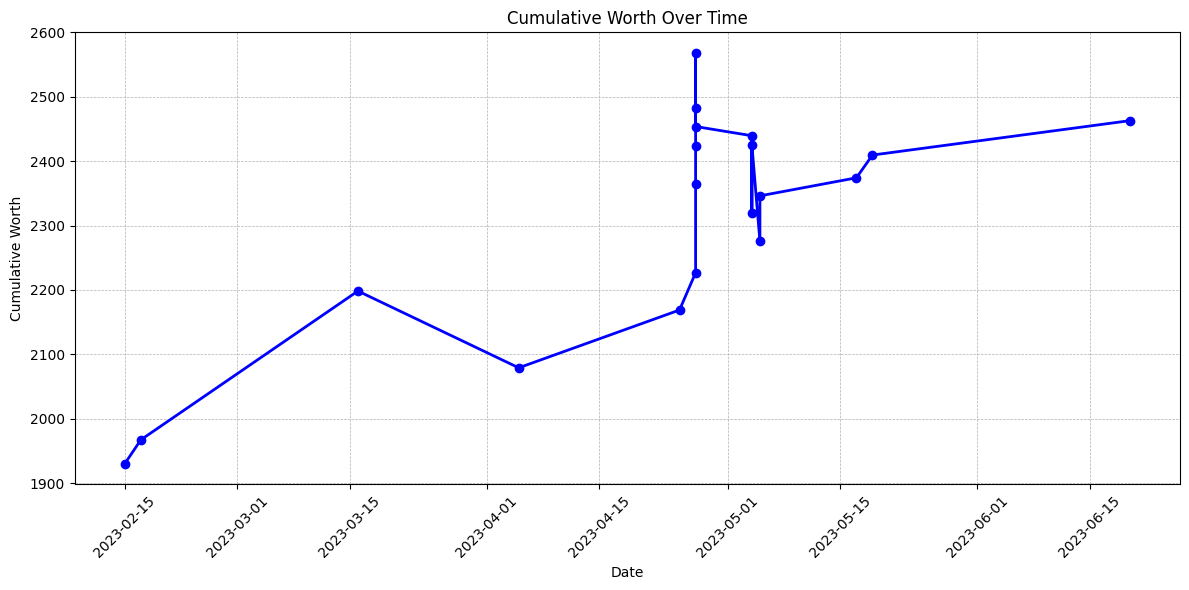

In [63]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(result_df['Date'], result_df['Cumulative Worth'], color='blue', marker='o', linestyle='-', linewidth=2)
plt.title('Cumulative Worth Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Worth')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


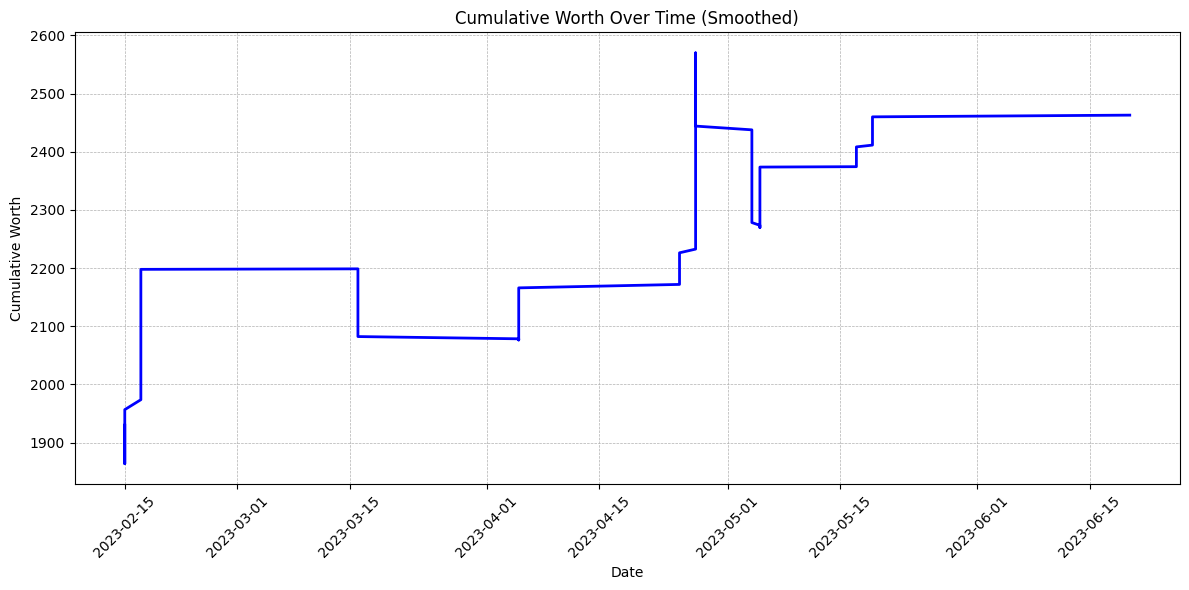

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline

# Extract the data
x = np.arange(len(result_df['Date']))
y = result_df['Cumulative Worth'].values

# Define a cubic spline interpolation
xnew = np.linspace(x.min(), x.max(), 300)  # 300 represents the number of points to interpolate
spl = make_interp_spline(x, y, k=3)
ynew = spl(xnew)

# Plotting the interpolated data
plt.figure(figsize=(12, 6))
plt.plot(result_df['Date'].iloc[xnew.astype(int)], ynew, color='blue', linestyle='-', linewidth=2)
plt.title('Cumulative Worth Over Time (Smoothed)')
plt.xlabel('Date')
plt.ylabel('Cumulative Worth')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


In [66]:
combinedData = pd.concat([oldData, newData], ignore_index=True)
print(combinedData.shape)  # This should print (290, number_of_columns)
combinedData


(290, 77)


,Ticker,Transcript,Month,Day,Year,Date,Words,negative,positive,uncertainty,...,18 Day Return,19 Day Return,22 Day Return,23 Day Return,24 Day Return,25 Day Return,26 Day Return,29 Day Return,30 Day Return,Random Feature
0,FDX,['fedex corporation (nyse:fdx) q2 2018 results...,12,19,2017,2017-12-19,"['fedex', 'cyberattack', 'tnt', 'ground', 'raj...",73,82,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FDX,"[""fedex corporation (nyse:fdx) q3 2018 results...",3,20,2018,2018-03-20,"['fedex', 'express', 'fy', 'raj', 'network', '...",88,77,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CAG,"[""conagra brands, inc. (nyse:cag) q3 2019 resu...",3,21,2018,2018-03-21,"['pinnacle', 'conagra', 'brand', 'legacy', 'fr...",75,77,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,COF,"[""capital one financial corp. (nyse:cof) q1 20...",4,24,2018,2018-04-24,"['card', 'growth', 'loan', 'auto', 'vintage', ...",125,77,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SO,"[""the southern co. (nyse:so) q1 2018 earnings ...",5,2,2018,2018-05-02,"['southern', 'equity', 'llc', 'art', 'inc', 't...",64,70,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,JCI,"['q2 2023 · earnings call transcript\nmay 5, 2...",5,5,2023,2023-05-05,"['backlog', 'instal', 'service', 'building', '...",99,78,22,...,-0.117937,-0.130321,NaN,NaN,-0.142899,-0.161378,-0.147446,NaN,NaN,0.014863
286,AES,"['q1 2023 · earnings call transcript\nmay 5, 2...",5,5,2023,2023-05-05,"['renewable', 'andre', 'project', 'aes', 'hydr...",100,78,19,...,0.074161,0.088305,NaN,NaN,0.050698,0.048123,0.065168,NaN,NaN,0.016396
287,CSCO,"[""q3 2023 á earnings call transcript\nmay 17, ...",5,17,2023,2023-05-17,"['cisco', 'backlog', 'growth', 'rpo', 'ai', 'g...",99,79,23,...,NaN,-0.073896,-0.069086,-0.074479,NaN,NaN,-0.079143,-0.066025,-0.060341,0.016135
288,DE,"['q2 2023 á earnings call transcript\nmay 19, ...",5,19,2023,2023-05-19,"['ag', 'inventory', 'production', 'farmer', 'p...",112,70,27,...,-0.090056,-0.119946,NaN,NaN,-0.110370,-0.102438,-0.103792,NaN,NaN,0.013801


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming your combined DataFrame is called 'data'
X = combinedData[['Polarity']]  # Features (input)
y = combinedData['6 Day Return']  # Target variable (output)

# Splitting the dataset into training and testing subsets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.011669518416126774


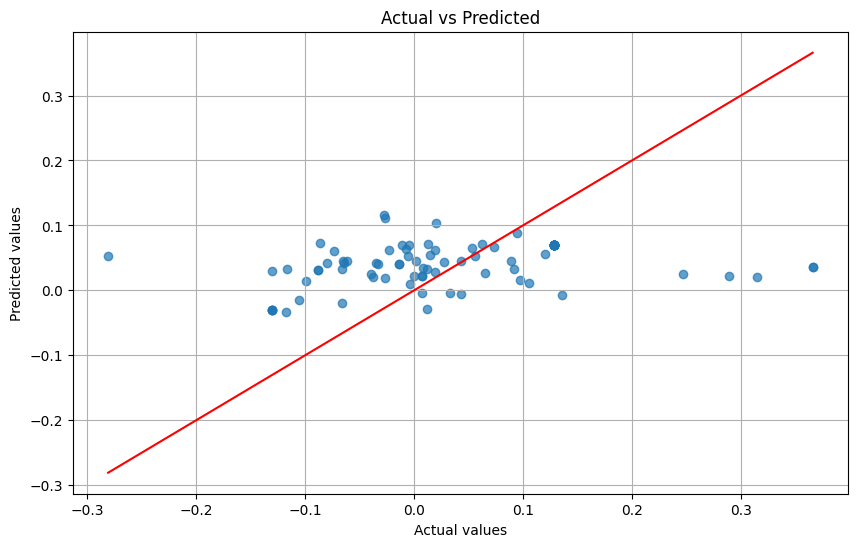

In [75]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data (replace with your own dataset split)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training a simple linear regression model as an example (replace with your model if different)
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Plotting the actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Line of perfect prediction
plt.title('Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid(True)
plt.show()


In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # If squared=False, this function returns RMSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.11
Mean Absolute Error (MAE): 0.08
R^2 Score: 0.08
